In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
%matplotlib inline
from scipy import stats

In [3]:
orginal_dataset=pd.read_csv('bank_marketing_part1_Data.csv')

In [4]:
orginal_dataset

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837
...,...,...,...,...,...,...,...
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443


In [6]:
orginal_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


1. 7 variables and 210 records.
2. No missing record based on intial analysis.
3. All the variables numeric type.

In [7]:
orginal_dataset.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [8]:
orginal_dataset.describe(percentiles=[.25,0.50,0.75,0.90]).T

,count,mean,std,min,25%,50%,75%,90%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,18.9880,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,16.4540,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.8993,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.2733,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,3.7865,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,5.5376,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.1850,6.5500


 Based on summary descriptive, the data looks good.
- We see for most of the variable, mean/medium are nearly equal
- Include a 90% to see variations and it looks distributely evenly
- Std Deviation is high for spending variable

# 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

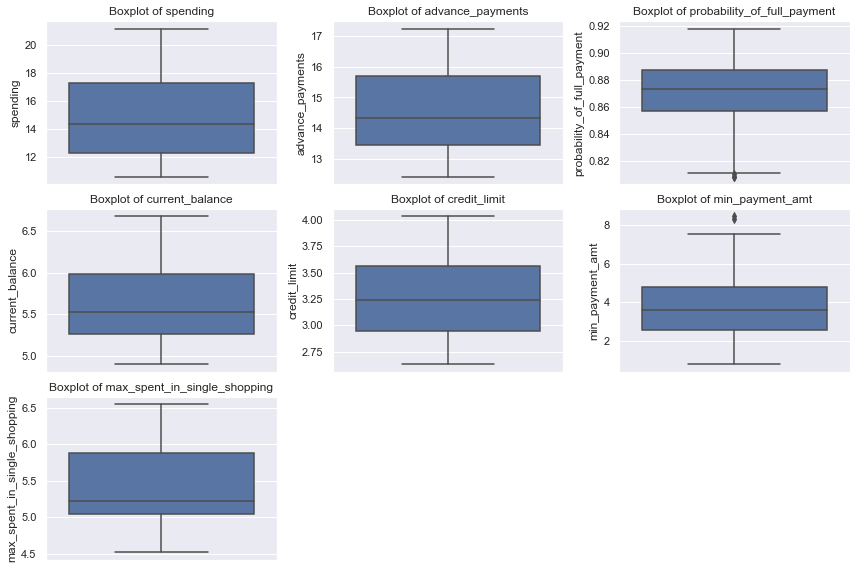

In [17]:
plt.figure(figsize = (12,8))
feature_list =orginal_dataset.columns
for i in range(len(feature_list)):
    plt.subplot(3,3, i + 1)
    sns.boxplot(y = orginal_dataset[feature_list[i]], data =orginal_dataset)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

<AxesSubplot:xlabel='probability_of_full_payment', ylabel='Count'>

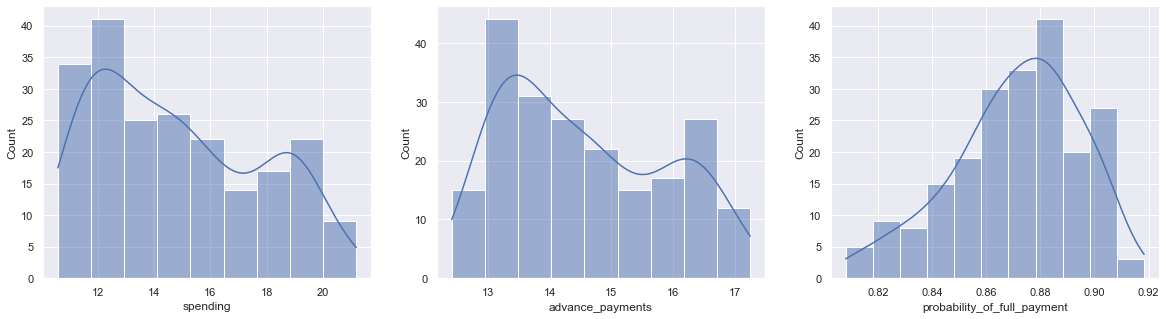

In [24]:
fig_dims = (20, 5) 
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=fig_dims) 
sns.histplot(orginal_dataset.spending, kde=True, ax=axs[0]) 
sns.histplot(orginal_dataset.advance_payments, kde=True, ax=axs[1]) 
sns.histplot(orginal_dataset.probability_of_full_payment, kde=True, ax=axs[2])

<AxesSubplot:xlabel='current_balance', ylabel='Count'>

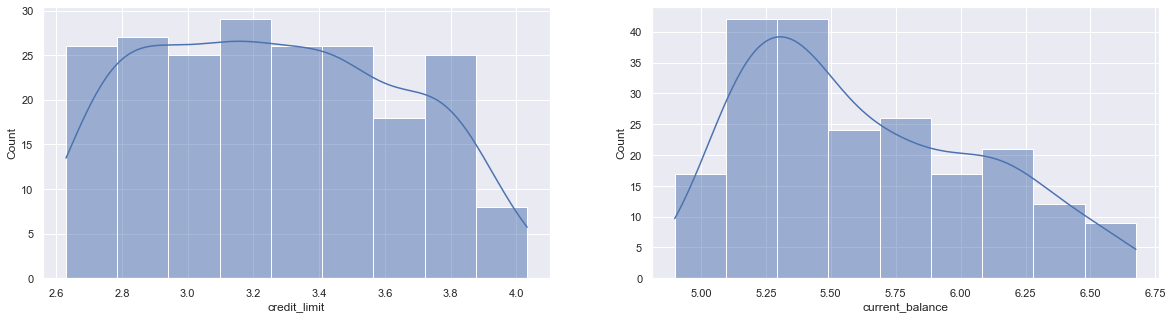

In [25]:
fig_dims = (20, 5) 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims) 
sns.histplot(orginal_dataset.credit_limit, kde=True, ax=axs[0])
sns.histplot(orginal_dataset.current_balance, kde=True, ax=axs[1])

<AxesSubplot:xlabel='max_spent_in_single_shopping', ylabel='Count'>

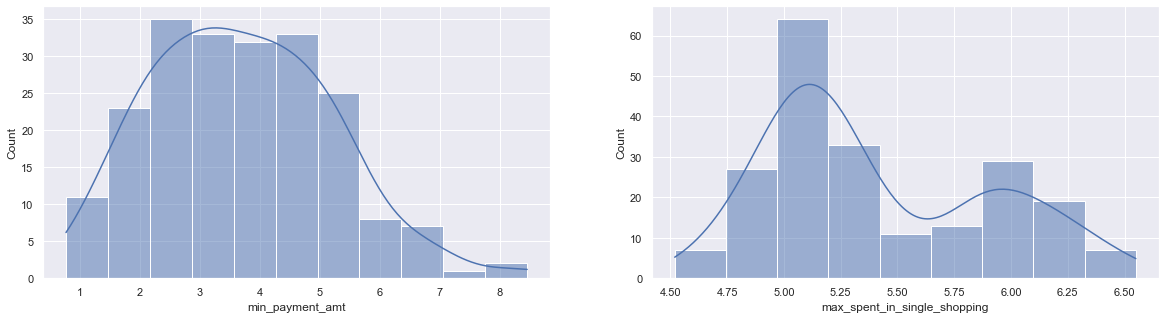

In [21]:
fig_dims = (20, 5) 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims) 
sns.histplot(orginal_dataset.min_payment_amt, kde=True, ax=axs[0]) 
sns.histplot(orginal_dataset.max_spent_in_single_shopping, kde=True, ax=axs[1]) 

 Distrubtion is skewed to right tail for all the variable execpt probability_of_full_payment variable, which has left tail

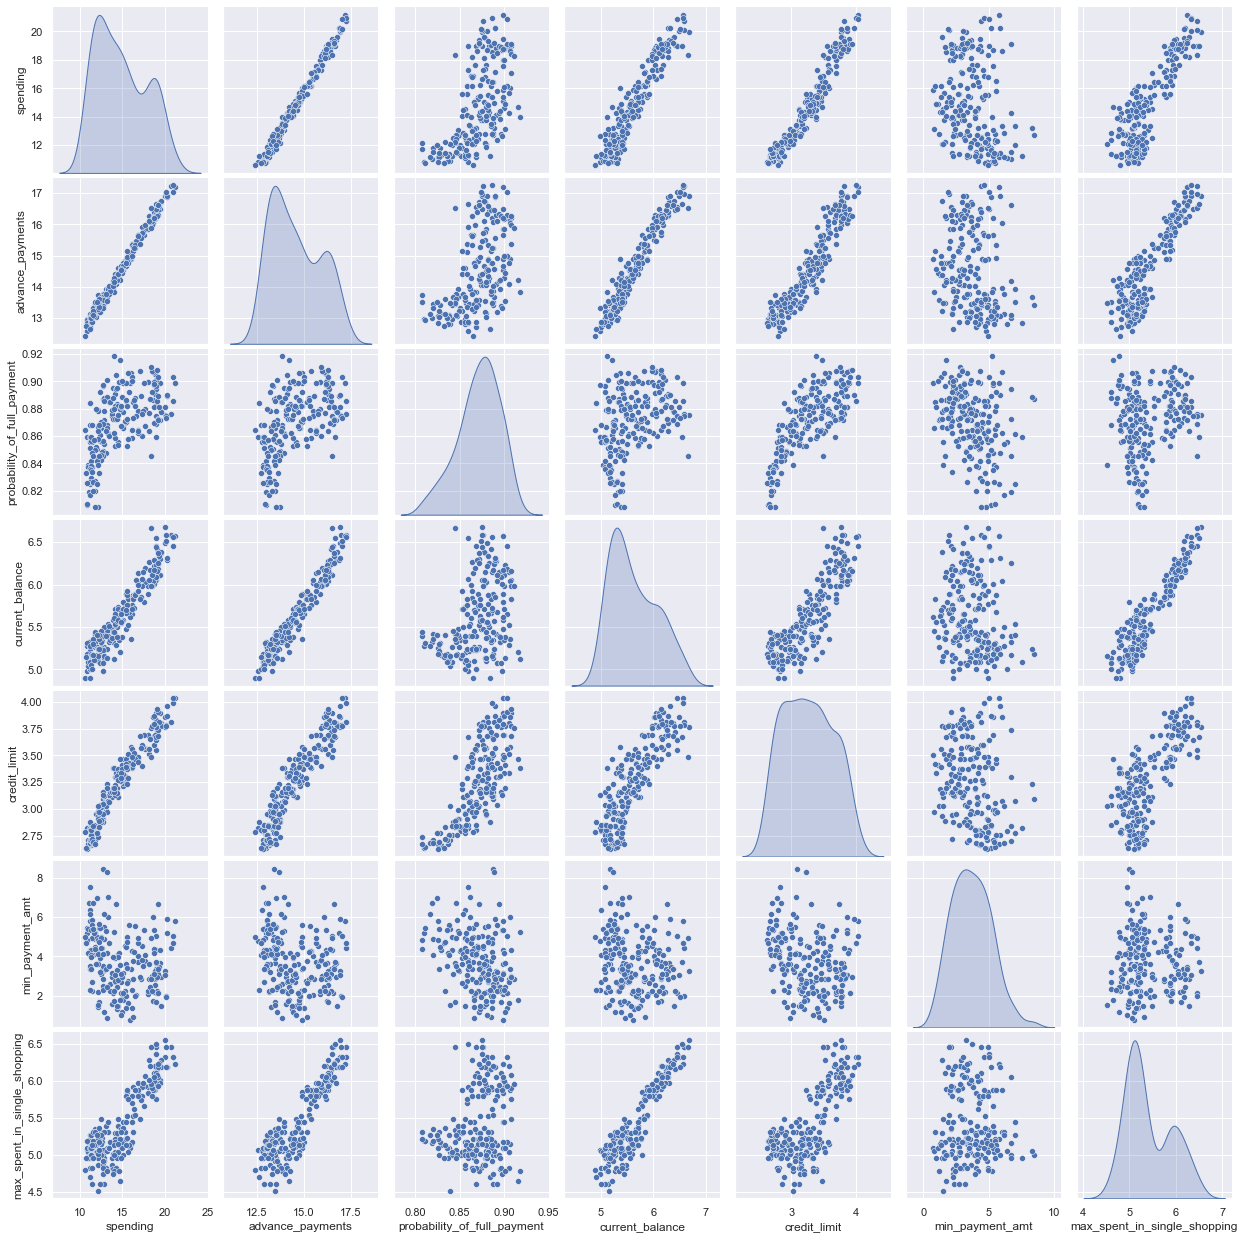

In [26]:
sns.pairplot(orginal_dataset,diag_kind='kde');

Strong positive correlation between 
        - spending & advance_payments, 
        - advance_payments & current_balance, 
        - credit_limit & spending
        - spending & current_balance
        - credit_limit & advance_payments
        - max_spent_in_single_shopping  current_balance

In [28]:
orginal_dataset.corr().T

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


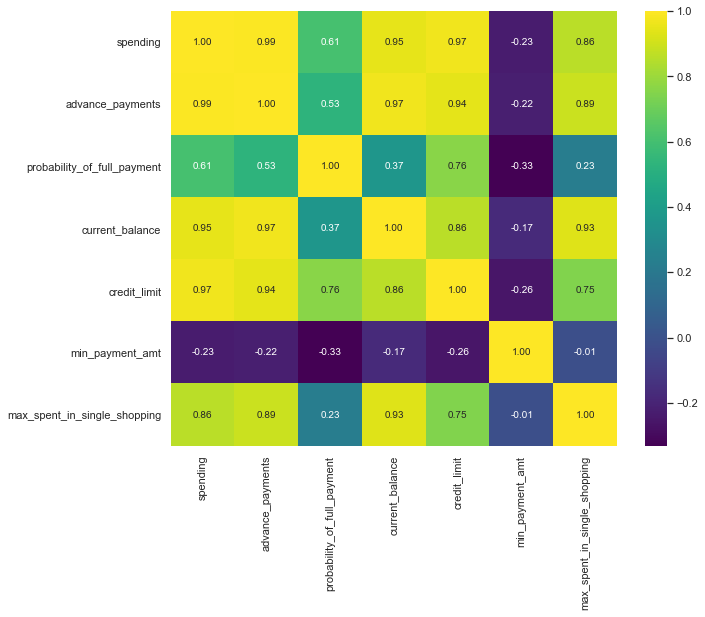

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(orginal_dataset.corr(),annot=True,fmt=".2f",cmap="viridis")
plt.show()

# Outliers treatment

In [30]:
clean_dataset=orginal_dataset.copy()

In [31]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [33]:
lrprobability_of_full_payment,urprobability_of_full_payment=remove_outlier(clean_dataset['probability_of_full_payment'])
clean_dataset['probability_of_full_payment']=np.where(clean_dataset['probability_of_full_payment']>urprobability_of_full_payment,urprobability_of_full_payment,clean_dataset['probability_of_full_payment'])
clean_dataset['probability_of_full_payment']=np.where(clean_dataset['probability_of_full_payment']<lrprobability_of_full_payment,lrprobability_of_full_payment,clean_dataset['probability_of_full_payment'])

In [34]:
lrmin_payment_amt,urmin_payment_amt=remove_outlier(clean_dataset['min_payment_amt'])
clean_dataset['min_payment_amt']=np.where(clean_dataset['min_payment_amt']>urmin_payment_amt,urmin_payment_amt,clean_dataset['min_payment_amt'])
clean_dataset['min_payment_amt']=np.where(clean_dataset['min_payment_amt']<lrmin_payment_amt,lrmin_payment_amt,clean_dataset['min_payment_amt'])

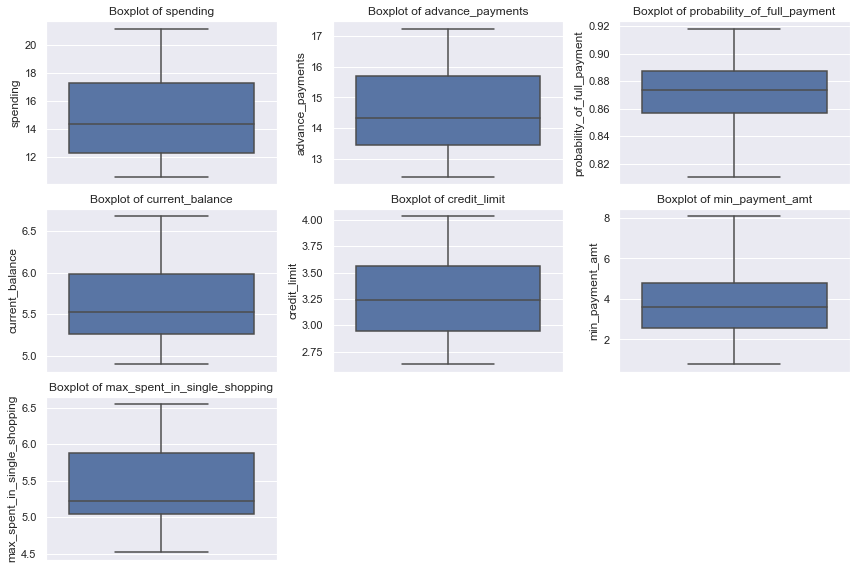

In [35]:
plt.figure(figsize = (12,8))
feature_list =clean_dataset.columns
for i in range(len(feature_list)):
    plt.subplot(3,3, i + 1)
    sns.boxplot(y = clean_dataset[feature_list[i]], data =clean_dataset)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

Most of the outlier has been treated and now we are good to go.

# 1.2 Do you think scaling is necessary for clustering in this case? Justify

Scaling needs to be done as the values of the variables are different.
spending, advance_payments are in different values and this may get more weightage.
Also have shown below the plot of the data prior and after scaling.
Scaling will have all the values in the relative same range.
I have used zscore to standarised the data to relative same scale -3 to +3.

In [36]:
from scipy.stats import zscore
clean_dataset_Scaled=orginal_dataset.apply(zscore)
clean_dataset_Scaled.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


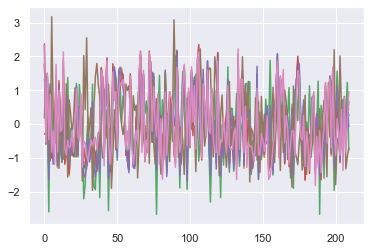

In [37]:
plt.plot(clean_dataset_Scaled)
plt.show()

# 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [39]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [40]:
link_method = linkage(clean_dataset_Scaled, method = 'average')

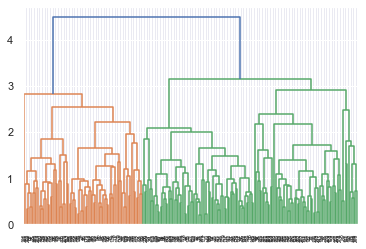

In [41]:
dend = dendrogram(link_method)

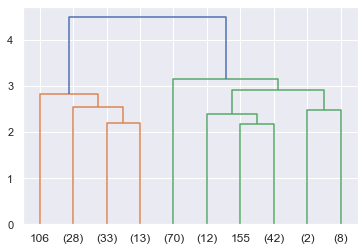

In [43]:
dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 10)

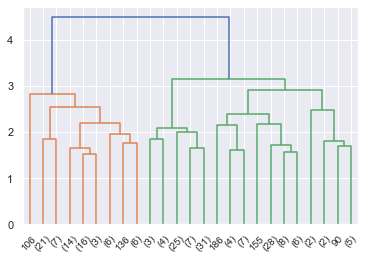

In [44]:
dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 25)

In [45]:
from scipy.cluster.hierarchy import fcluster

In [89]:
clusters_3 = fcluster(link_method, 3, criterion='maxclust')
clusters_3

array([1, 3, 1, 2, 1, 3, 2, 2, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 1, 1, 1,
       1, 3, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 2, 3, 1,
       1, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 2, 3, 1,
       3, 3, 2, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 2, 3, 2, 3, 1, 1, 1,
       3, 2, 3, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 3, 3, 2, 1, 3, 1, 3, 3, 1], dtype=int32)

In [48]:
cluster3_dataset=orginal_dataset.copy()

In [49]:
cluster3_dataset['clusters-3'] = clusters_3

In [50]:
cluster3_dataset.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters-3
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [51]:
cluster3_dataset['clusters-3'].value_counts().sort_index()

1    75
2    70
3    65
Name: clusters-3, dtype: int64

In [86]:
aggdata=cluster3_dataset.groupby('clusters-3').mean()
aggdata['Freq']=cluster3_dataset['clusters-3'].value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters-3,,,,,,,,
1,18.129200,16.058000,0.881595,6.135747,3.648120,3.650200,5.987040,75
2,11.916857,13.291000,0.846766,5.258300,2.846000,4.619000,5.115071,70
3,14.217077,14.195846,0.884869,5.442000,3.253508,2.768418,5.055569,65


Both the method are almost similer means , minor variation, which we know it occurs.

1. We for cluster grouping based on the dendrogram, 3 or 4 looks good. Did the further analysis, and based on the dataset had gone for 3 group cluster solution based on the hierarchical clustering

2. Also in real time, there colud have been more variables value captured - tenure, BALANCE_FREQUENCY, balance, purchase, installment of purchase, others.

3. And three group cluster solution gives a pattern based on high/medium/low spending with max_spent_in_single_shopping (high value item) and probability_of_full_payment(payment made).

# 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score.

In [54]:
from sklearn.cluster import KMeans 

In [57]:
k_means = KMeans(n_clusters = 1)
k_means.fit(clean_dataset_Scaled)
k_means.inertia_

1469.9999999999995

In [58]:
k_means = KMeans(n_clusters = 2)
k_means.fit(clean_dataset_Scaled)
k_means.inertia_

659.1717544870411

In [59]:
k_means = KMeans(n_clusters = 3)
k_means.fit(clean_dataset_Scaled)
k_means.inertia_

430.65897315130064

In [60]:
k_means = KMeans(n_clusters = 4)
k_means.fit(clean_dataset_Scaled)
k_means.inertia_

371.5811909715524

In [61]:
wss =[]

In [62]:
for i in range(1,11):
        KM = KMeans(n_clusters=i)
        KM.fit(clean_dataset_Scaled)
        wss.append(KM.inertia_)

In [63]:
wss

[1469.9999999999995,
 659.1717544870411,
 430.65897315130064,
 371.301721277542,
 327.02382989355755,
 289.46717056412893,
 262.29932459915625,
 239.7050838367616,
 223.81418325614555,
 207.96677976953157]

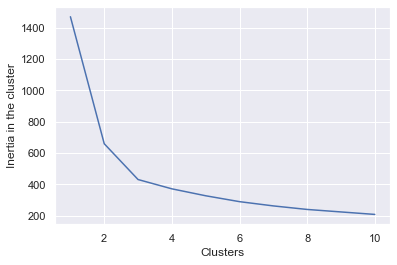

In [64]:
plt.plot(range(1,11), wss)
plt.xlabel("Clusters")
plt.ylabel("Inertia in the cluster")
plt.show()

In [65]:
k_means_4 = KMeans(n_clusters = 4)
k_means_4.fit(clean_dataset_Scaled)
labels_4 = k_means_4.labels_

In [66]:
kmeans4_dataset=orginal_dataset.copy()

In [67]:
kmeans4_dataset["Clus_kmeans"] = labels_4
kmeans4_dataset.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,3
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,3
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,3


In [68]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [69]:
silhouette_score(clean_dataset_Scaled,labels_4)

0.3291966792017613

In [70]:
from sklearn import metrics

In [71]:
scores = []
k_range = range(2, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(clean_dataset_Scaled)
    scores.append(metrics.silhouette_score(clean_dataset_Scaled, km.labels_))
    
scores

[0.46577247686580914,
 0.40072705527512986,
 0.3291966792017613,
 0.28316654897654814,
 0.2897583830272519,
 0.2694844355168536,
 0.2543731602750563,
 0.2623959398663564,
 0.2673980772529918]

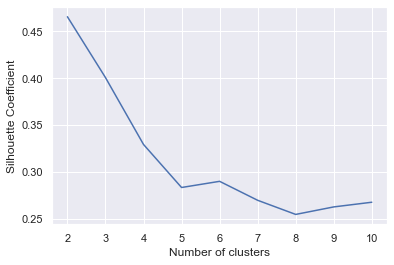

In [72]:
plt.plot(k_range,scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

From SC Score, the number of optimal clusters could be 3 or 4

In [73]:
sil_width = silhouette_samples(clean_dataset_Scaled,labels_4)

In [74]:
kmeans4_dataset["sil_width"] = sil_width
kmeans4_dataset.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,3,0.432658
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2,0.099543
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,3,0.425893
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0,0.529852
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,3,0.082791


In [75]:
silhouette_samples(clean_dataset_Scaled,labels_4).min()

-0.051158059328679784

## 3 Cluster solution

In [76]:
km_3 = KMeans(n_clusters=3,random_state=123)

In [77]:
km_3.fit(clean_dataset_Scaled)
km_3.labels_

array([0, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1,
       0, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0,
       1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 0,
       0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 2, 2, 2, 0, 1, 2, 0, 2,
       0, 1, 2, 0, 2, 1, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 1, 1, 0,
       2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2,
       2, 0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 2,
       1, 2, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 0, 0,
       2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 1, 2, 1, 0, 2, 0, 0, 1,
       0, 1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 2])

In [78]:
pd.Series(km_3.labels_).value_counts()

1    72
2    71
0    67
dtype: int64

In [79]:
kmeans1_dataset=orginal_dataset.copy()

In [80]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(clean_dataset_Scaled)

y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1

cluster = pd.DataFrame(y_kmeans1)

kmeans1_dataset['cluster'] = cluster
kmeans_mean_cluster = pd.DataFrame(round(kmeans1_dataset.groupby('cluster').mean(),1))
kmeans_mean_cluster

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
cluster,,,,,,,
1,18.5,16.2,0.9,6.2,3.7,3.6,6.0
2,11.9,13.2,0.8,5.2,2.8,4.7,5.1
3,14.4,14.3,0.9,5.5,3.3,2.7,5.1


In [81]:
def ClusterPercentage(datafr,name):
    
    size = pd.Series(datafr[name].value_counts().sort_index())
    percent = pd.Series(round(datafr[name].value_counts()/datafr.shape[0] * 100,2)).sort_index()

    size_df = pd.concat([size, percent],axis=1)
    size_df.columns = ["Cluster_Size","Cluster_Percentage"]
    
    return(size_df)

In [82]:
ClusterPercentage(kmeans1_dataset,"cluster")

,Cluster_Size,Cluster_Percentage
1,67,31.90
2,72,34.29
3,71,33.81


# 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

In [83]:
cluster_3_T = kmeans_mean_cluster.T
cluster_3_T

cluster,1,2,3
spending,18.5,11.9,14.4
advance_payments,16.2,13.2,14.3
probability_of_full_payment,0.9,0.8,0.9
current_balance,6.2,5.2,5.5
credit_limit,3.7,2.8,3.3
min_payment_amt,3.6,4.7,2.7
max_spent_in_single_shopping,6.0,5.1,5.1


# 3 group cluster via hierarchical clustering

In [87]:
aggdata.T

clusters-3,1,2,3
spending,18.129200,11.916857,14.217077
advance_payments,16.058000,13.291000,14.195846
probability_of_full_payment,0.881595,0.846766,0.884869
current_balance,6.135747,5.258300,5.442000
credit_limit,3.648120,2.846000,3.253508
min_payment_amt,3.650200,4.619000,2.768418
max_spent_in_single_shopping,5.987040,5.115071,5.055569
Freq,75.000000,70.000000,65.000000


Cluster Group Profiles
Group 1 : High Spending
Group 3 : Medium Spending
Group 2 : Low Spending

Group 1 : High Spending Group
- Giving any reward points might increase their purchases.
- maximum max_spent_in_single_shopping is high for this group, so can be offered discount/offer on next transactions upon full payment
- Increase there credit limit and 
- Increase spending habits
- Give loan against the credit card, as they are customers with good repayment record.
- Tie up with luxary brands, which will drive more one_time_maximun spending

Group 3 : Medium Spending Group
- They are potential target customers who are paying bills and doing purchases and maintaining comparatively good credit score. So we can increase credit limit or can lower down interest rate. 
- Promote premium cards/loyality cars to increase transcations.
- Increase spending habits by trying with premium ecommerce sites, travel portal, travel airlines/hotel, as this will encourge them to spend more

Group 2 : Low Spending Group
- customers should be given remainders for payments. Offers can be provided on early payments to improve their payment rate.
- Increase there spending habits by tieing up with grocery stores, utlities (electircity, phone, gas, others)